In [26]:
import os
import duckdb
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import (AutoARIMA, AutoETS, AutoTheta, AutoCES, HoltWinters)
from statsforecast.utils import AirPassengersDF
import matplotlib.pyplot as plt
import matplotlib

os.environ['NIXTLA_ID_AS_COL'] = '1'

In [27]:
os.getcwd()

'/Users/ben/GitHub/bbgatch.github.io/projects/tsa/2024-05-18-forecasting-tsa-data'

In [28]:
df = duckdb.sql("""
    select
        'tsa_passengers' as unique_id
        ,date_trunc('month', Date) as ds
        ,sum(Passengers) as y
    from '../2024-05-07-revisiting-tsa-data-pull/tsa.csv'
    where Date between '2019-01-01' and '2024-04-30'
    group by 1, 2
    order by ds
""").to_df()

In [35]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12),
              AutoETS(season_length = 12),
              AutoTheta(season_length = 12),
              AutoCES(season_length = 12),
              HoltWinters(season_length=12)
    ],
    freq = 'M'
)

sf.fit(df)
forecast_df = sf.predict(h=9, level=[90])
# print(forecast_df)
forecast_df['comb_arima_hw'] = (forecast_df['AutoARIMA'] + forecast_df['HoltWinters']) / 2
print(forecast_df)

        unique_id         ds   AutoARIMA  AutoARIMA-lo-90  AutoARIMA-hi-90  \
0  tsa_passengers 2024-04-30  74111584.0       61550860.0       86672304.0   
1  tsa_passengers 2024-05-31  74521280.0       53198016.0       95844536.0   
2  tsa_passengers 2024-06-30  75205728.0       46667136.0      103744320.0   
3  tsa_passengers 2024-07-31  73770464.0       39141984.0      108398952.0   
4  tsa_passengers 2024-08-31  72162144.0       32246134.0      112078144.0   
5  tsa_passengers 2024-09-30  73854880.0       29234304.0      118475448.0   
6  tsa_passengers 2024-10-31  72612520.0       23724602.0      121500440.0   
7  tsa_passengers 2024-11-30  72874824.0       20058590.0      125691064.0   
8  tsa_passengers 2024-12-31  70372928.0       13899353.0      126846504.0   

      AutoETS  AutoETS-lo-90  AutoETS-hi-90   AutoTheta  AutoTheta-lo-90  \
0  73821672.0     60555188.0     87088152.0  73853544.0       62115932.0   
1  73821672.0     55060968.0     92582368.0  73853544.0       56111

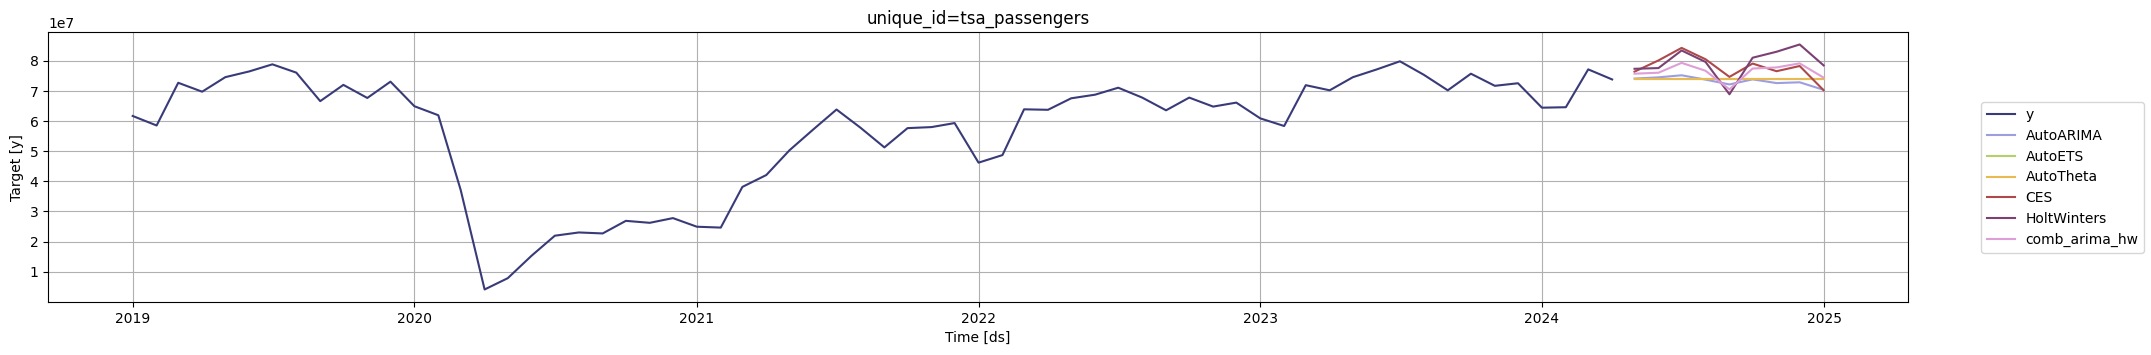

In [36]:
sf.plot(df, forecast_df)
# sf.plot(df, forecast_df, level=[90])
# plt.show()